<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
# General purpose related packages
import pandas as pd
import numpy as np
import re
import math
import os
import sys
from datetime import datetime
import pickle


# import Visualization related packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.manifold import TSNE
from wordcloud import WordCloud


# Data Preprocessing related packages
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

# Dim reduction related packages
from sklearn.decomposition import TruncatedSVD

# Feature Extraction related pacakages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Evaluation metrics related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss


# Model selection related packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Model related packages
from sklearn.linear_model import LogisticRegression

# Confings

In [2]:
base_dir = '/media/amd_3/20DAD539DAD50BC2/DSET_REPO/DataSets/CS02-PEARSON_CANCER/'
sample_size = -1 # set sample size for test -1 for full data

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [3]:
data = pd.read_csv(os.path.join(base_dir, 'training_variants'))
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
data.head()

Number of data points :  3321
Number of features :  4


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [4]:
# note the seprator in this file
data_text =pd.read_csv(os.path.join(base_dir,'training_text'),
                       sep='\|\|',engine='python',names=['ID','TEXT'], skiprows=1)
print('Number of data point : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
data_text.head()

Number of data point :  3321
Number of features :  2


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [5]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))

In [6]:
def clean_text(text_str):
    """
    This function does cleaning of the text. IT 
    """
    
    if  type(text_str) is not str:
        print('There is no text description ',text_str)
        return str()
    
    # STEP 1: replace every special char with space
    text_str = re.sub('[^a-zA-Z0-9\n]', ' ', text_str)
    # STEP 2: converting all the chars into lower-case.
    text_str = text_str.lower()
    # STEP 3: Remove stop words
    text_str = ' '.join(list(filter(lambda x : x not in stop_words, text_str.split())))
    
    return text_str

In [7]:
data_text['TEXT'] = data_text['TEXT'].apply(clean_text)
data_text.head()

There is no text description  nan
There is no text description  nan
There is no text description  nan
There is no text description  nan
There is no text description  nan


,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [8]:
#merging both gene_variations and text data based on ID
combined_df = pd.merge(data, data_text, on='ID', how='left')
combined_df = combined_df[['ID', 'Gene', 'Variation', 'TEXT', 'Class']]
combined_df.head()

,ID,Gene,Variation,TEXT,Class
0,0,FAM58A,Truncating Mutations,cyclin dependent kinases cdks regulate variety...,1
1,1,CBL,W802*,abstract background non small cell lung cancer...,2
2,2,CBL,Q249E,abstract background non small cell lung cancer...,2
3,3,CBL,N454D,recent evidence demonstrated acquired uniparen...,3
4,4,CBL,L399V,oncogenic mutations monomeric casitas b lineag...,4


In [9]:
# display all rows where the text is empty
text_empty_df = combined_df[combined_df['TEXT'].apply(len) == 0]
empy_ids = text_empty_df.index.tolist()
text_empty_df

,ID,Gene,Variation,TEXT,Class
1109,1109,FANCA,S1088F,,1
1277,1277,ARID5B,Truncating Mutations,,1
1407,1407,FGFR3,K508M,,6
1639,1639,FLT1,Amplification,,6
2755,2755,BRAF,G596C,,7


In [10]:
# replace nan values gene + variation string 
combined_df.loc[empy_ids, 'TEXT'] =  combined_df['Gene'] + ' ' + combined_df['Variation']
combined_df.head()

,ID,Gene,Variation,TEXT,Class
0,0,FAM58A,Truncating Mutations,cyclin dependent kinases cdks regulate variety...,1
1,1,CBL,W802*,abstract background non small cell lung cancer...,2
2,2,CBL,Q249E,abstract background non small cell lung cancer...,2
3,3,CBL,N454D,recent evidence demonstrated acquired uniparen...,3
4,4,CBL,L399V,oncogenic mutations monomeric casitas b lineag...,4


In [11]:
combined_df.loc[empy_ids, 'TEXT']

1109                   FANCA S1088F
1277    ARID5B Truncating Mutations
1407                    FGFR3 K508M
1639             FLT1 Amplification
2755                     BRAF G596C
Name: TEXT, dtype: object

In [12]:
combined_df.dtypes

ID            int64
Gene         object
Variation    object
TEXT         object
Class         int64
dtype: object

### Remove extra spaces and join two words with an underscore

In [13]:
combined_df['Gene'] = combined_df['Gene'].apply(lambda x : '_'.join(x.split()))
combined_df['Variation'] = combined_df['Variation'].apply(lambda x : '_'.join(x.split()))
combined_df.head()

,ID,Gene,Variation,TEXT,Class
0,0,FAM58A,Truncating_Mutations,cyclin dependent kinases cdks regulate variety...,1
1,1,CBL,W802*,abstract background non small cell lung cancer...,2
2,2,CBL,Q249E,abstract background non small cell lung cancer...,2
3,3,CBL,N454D,recent evidence demonstrated acquired uniparen...,3
4,4,CBL,L399V,oncogenic mutations monomeric casitas b lineag...,4


<h3>3.1.4 Train, Validationand  and Test Split</h3>

In [14]:
if sample_size > 0:
    combined_df = combined_df.groupby(['Class']).apply(lambda x : x.sample(n= min(sample_size, 
                    x.shape[0])))
    
combined_df['Class'].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [15]:
# split the data into train and test by maintaining same distribution of class
train_df, test_df  = train_test_split(combined_df, stratify=combined_df['Class'], 
                                      test_size=0.3, shuffle=True)

# reset index
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [16]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
train_df.head()

Number of data points in train data: 2324
Number of data points in test data: 997


,ID,Gene,Variation,TEXT,Class
0,837,ABL1,BCR-ABL1_Fusion,bcr abl oncogene generated philadelphia chromo...,7
1,493,TP53,R156C,tumor suppressor p53 dependent apoptosis thoug...,1
2,1376,AKT2,Amplification,previously demonstrated putative oncogene akt2...,7
3,3283,RET,E768D,several mutations identi ed kinase domain ret ...,2
4,2708,BRAF,FAM131B-BRAF_Fusion,genes crucial cancer development mutated via v...,7


In [17]:
def show_class_distribution(df, title):
    """
    This function displays the distribution of each class as a barchart
    """
    count_df = pd.DataFrame(list(dict(df['Class'].value_counts()).items()), 
                            columns=['Class', 'Count'])
    
    plt.title('Class Distribution of '+ title + ' Data')
    plt.xlabel('Class')
    plt.ylabel('Count')
    sns.barplot(x='Class', y =count_df['Count'], data=count_df)
    
    plt.show()

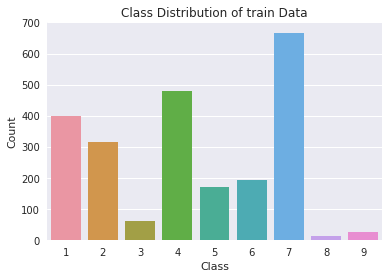

In [18]:
show_class_distribution(train_df, 'train')

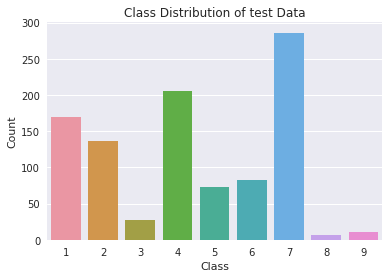

In [19]:
show_class_distribution(test_df, 'test')

<h4> Observations </h4>
<ul>
<li> The dataset is not a balanced dataset </li>
<li> The number of samples in class 3,8,9 is very less compared to others </li>
</ul>

<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [20]:
def plot_confusion_matrix(test_y, predict_y):
    
    # declarea all possible labels
    num_class = 9
    labels_list = range(1, num_class + 1)
    
    # get confusion matrix
    conf_matrix = confusion_matrix(test_y, predict_y, labels=labels_list)
    conf_matrix = pd.DataFrame(conf_matrix)

    # get precision matrix
    precision_matrix = conf_matrix.div(conf_matrix.sum(axis=0), axis=0) 
    
    # get recall matrix
    recall_matrix = conf_matrix.div(conf_matrix.sum(axis=1), axis=0)

    # representing Confusion matrix
    print("="*100)
    plt.figure(figsize=(20,7))
    sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='g', xticklabels=labels_list, 
                yticklabels=labels_list)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

    
    # Representing Precision Matrix
    print("="*100)
    plt.figure(figsize=(20,7))
    sns.heatmap(precision_matrix, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=labels_list, 
                yticklabels=labels_list)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Precision Matrix')
    plt.show()
    
    # representing Recall Matrix
    print("-"*100)
    plt.figure(figsize=(20,7))
    sns.heatmap(recall_matrix, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=labels_list,
                yticklabels=labels_list)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Recall Matrix')
    plt.show()

## Loss from the random model on validation, test data

In [21]:
def predict_using_random_model(df, df_type):

    # create a random prediction dataframe
    rand_df = pd.DataFrame(np.random.rand(df.shape[0], 9))

    # convert each row into a probability distribution
    rand_df = rand_df.div(rand_df.sum(axis=1), axis=0)
    
    # compute log loss
    log_loss_val = log_loss(df['Class'], rand_df.values, eps=1e-15)

    # get log loss on validation from the random model prediction
    print('Log loss on %s data using Random Model : %f'%(df_type, log_loss_val,))
    
    return rand_df

In [22]:
rand_df_test = predict_using_random_model(test_df, 'Test')

Log loss on Test data using Random Model : 2.506966


## Plot random model confusion matrix, precision matrix, recall matrix on test data

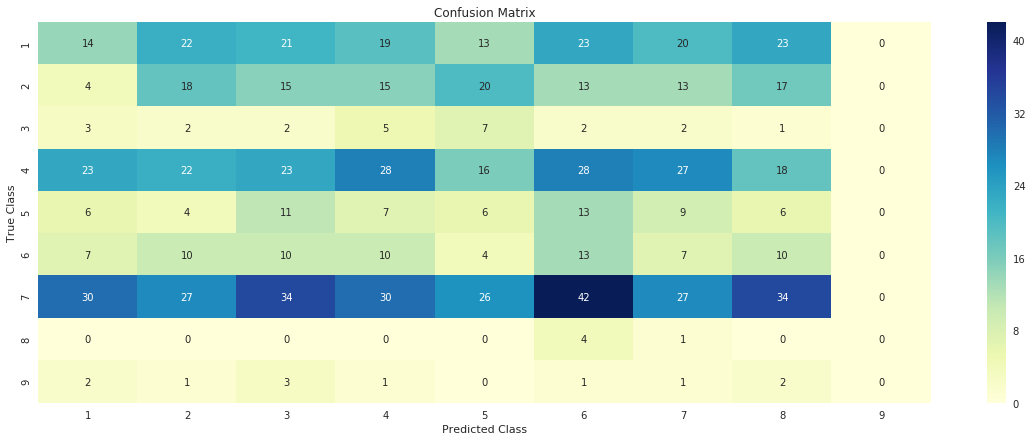

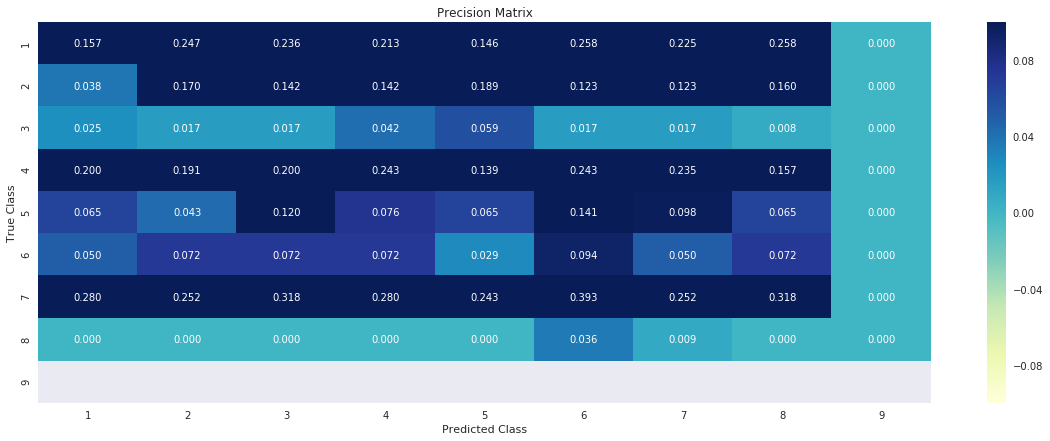

----------------------------------------------------------------------------------------------------


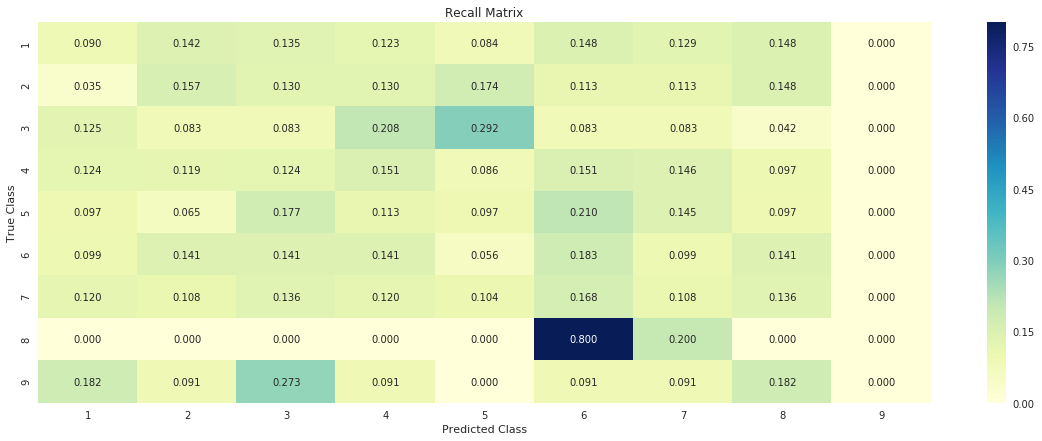

In [23]:
predicted_y_test = np.argmax(rand_df_test.values, axis=1)
plot_confusion_matrix(test_df['Class'], predicted_y_test)

<h3> Observations </h3>
<ul>
<li> Rnadom model has test log loss of 2.5069 </li>
<li> Random model did not predict any instance as class 9</li>
</ul>

## Encoding of Categorical Values

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

### a) Response encoding of categorical values (Gene & Variation)

In [24]:
def get_response_encoded_dict(df, feat_name, alpha_val):
    
    # set labels list
    labels_list = list(range(1,10)) # we have 9 clasess (1 to 9)
    
    # get the total count for each categorical value as a dictionary
    value_counts = dict(df[feat_name].value_counts())
    
    # declare a dictionary for response encoded vectors
    response_coded_dict = dict()
    
    # group by on feature column
    for category_name, feat_df in df.groupby([feat_name]):
        
        # declare a vector for this category name
        responde_encoding_vec = list()
        
        for label in labels_list:
            # set numerator for each label
            numerator = feat_df[feat_df['Class'] == label].shape[0]
            denominator = value_counts[category_name]
            # append it to list
            responde_encoding_vec.append((numerator + 10 * alpha_val) / 
                                     (denominator + 90 * alpha_val))

        # save the response encoded vector for this category
        response_coded_dict[category_name] = responde_encoding_vec
        
        
    return response_coded_dict

In [25]:
def get_response_encoded_data(df, response_coded_dict, feat_name):
    
    # set number of clasess
    num_clasess = 9
    
    # declare a data list for encoded data
    encoded_data_list = list()
    
    # encode each category
    for category in df[feat_name]:
        
        try:
            vector = response_coded_dict[category]
            encoded_data_list.append(vector)
            
        except: # in case the feature is not present in train df assign equal values
                # to all dimensions
            encoded_data_list.append([1 / num_clasess] * num_clasess )
        
    # create encoded data df
    col_names = [feat_name + '_cls_' + str(item) for item in range(1, num_clasess + 1)]
    encoded_df = pd.DataFrame(encoded_data_list, columns=col_names)
    
    # normalize the data frame
    encoded_df = pd.DataFrame(normalize(encoded_df.values, norm='l2', axis=1), 
                              columns=col_names)
    
    return encoded_df

In [26]:
alpha_val = 1.0
res_gene_encoded_dict = get_response_encoded_dict(train_df, 'Gene', alpha_val)
res_variation_encoded_dict = get_response_encoded_dict(train_df, 'Variation', alpha_val)
print('Number of different gene values :', len(res_gene_encoded_dict))
print('Number of different variation values :', len(res_variation_encoded_dict))

Number of different gene values : 243
Number of different variation values : 2094


### a1) Get response encoded Gene data

In [27]:
res_encoded_gene_train = get_response_encoded_data(train_df, res_gene_encoded_dict, 'Gene')
res_encoded_gene_test = get_response_encoded_data(test_df, res_gene_encoded_dict, 'Gene')
res_encoded_gene_test.head()

,Gene_cls_1,Gene_cls_2,Gene_cls_3,Gene_cls_4,Gene_cls_5,Gene_cls_6,Gene_cls_7,Gene_cls_8,Gene_cls_9
0,0.133363,0.102587,0.153881,0.943801,0.123104,0.102587,0.102587,0.102587,0.102587
1,0.527026,0.087838,0.210810,0.324999,0.614864,0.404053,0.087838,0.087838,0.087838
2,0.298829,0.353162,0.271663,0.298829,0.271663,0.325995,0.543326,0.271663,0.271663
3,0.192095,0.268933,0.345770,0.192095,0.249723,0.192095,0.749169,0.192095,0.192095
4,0.147154,0.529756,0.147154,0.147154,0.147154,0.161870,0.750487,0.147154,0.147154


### a2) Get response encoded variation data

In [28]:
res_encoded_var_train = get_response_encoded_data(train_df, res_variation_encoded_dict, 'Variation')
res_encoded_var_test = get_response_encoded_data(test_df, res_variation_encoded_dict, 'Variation')
res_encoded_var_test.head()

,Variation_cls_1,Variation_cls_2,Variation_cls_3,Variation_cls_4,Variation_cls_5,Variation_cls_6,Variation_cls_7,Variation_cls_8,Variation_cls_9
0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
2,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
3,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
4,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


### b)  Onehot encoding of Categorical features (b1. Gene & b2. Variation)

In [29]:
# declare a count vectorizer object
count_vec= CountVectorizer()

# fit to the Gene feature
count_vec.fit(train_df['Gene'])
col_name_list = count_vec.get_feature_names()

# featurize the Gene column
gene_count_feat_train = pd.DataFrame(count_vec.transform(train_df['Gene']).toarray(), 
                                     columns=col_name_list)
gene_count_feat_test = pd.DataFrame(count_vec.transform(test_df['Gene']).toarray(),
                                     columns=col_name_list)

# featurize the Variation info
count_vec.fit(train_df['Variation'])
col_name_list = count_vec.get_feature_names()

# featurize the Variation column
var_count_feat_train = pd.DataFrame(count_vec.transform(train_df['Variation']).toarray(),
                                                       columns=col_name_list)
var_count_feat_test = pd.DataFrame(count_vec.transform(test_df['Variation']).toarray(),
                                                      columns=col_name_list)


print('Shape of count encoded gene feature for validation :', gene_count_feat_test.shape)
print('Shape of count encoded variation feature for validation :', var_count_feat_test.shape)

Shape of count encoded gene feature for validation : (997, 242)
Shape of count encoded variation feature for validation : (997, 2125)


<h2>3.3 Univariate Analysis</h2>

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

In [30]:
def plot_feature_distributions(df, feat_name, text_mode=False):
    
    # get the value count of features
    
    if text_mode:
        # combine text of all 
        full_text = ' '.join(df[feat_name])
        count_vectorizer = CountVectorizer()
        count_vectorizer.fit([full_text])
    
        # get feature names
        cat_value_counts = pd.Series(count_vectorizer.transform([full_text]).toarray()[0])
        cat_value_counts.index = count_vectorizer.get_feature_names()
    
    else:
        # get value count of each categorical variable
        cat_value_counts = df[feat_name].value_counts()
    
    # print required information
    print('Number of unique ' + feat_name + ' features : ', len(cat_value_counts))
    print('The features are distributed as below: \n')
    
    # plot PDF & CDF of the categorical feature
    s = sum(cat_value_counts.values);
    h = cat_value_counts.values/s;
    c = np.cumsum(h)
    
    # plot PDF & CDF
    plt.plot(h, label='Histrogram: ' + feat_name + ' feature')
    plt.plot(c,label='CDF of ' + feat_name + ' feature')
    
    # set axis labels and plot it
    plt.xlabel(feat_name + ' Indices')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

Number of unique Gene features :  243
The features are distributed as below: 



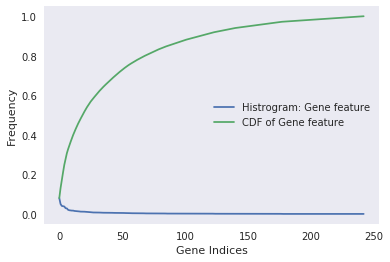

In [31]:
plot_feature_distributions(train_df, 'Gene')

<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

In [32]:
def find_best_hyperparam_logreg(model, param_dict, X, y):

    # create a grid search object to find the best hyperparam
    grid_search_obj = GridSearchCV(estimator=model, param_grid=param_dict, 
                                  scoring='neg_log_loss', cv=3, n_jobs=-1, refit=False,
                                  return_train_score=True)
    
    # fit to the data
    grid_search_obj.fit(X, y)
    
    # get best hyperparam
    best_hyp_value = grid_search_obj.best_params_
    
    # get complete information of this training
    cv_info_df = pd.DataFrame(grid_search_obj.cv_results_, index=range(6))
    
    # get mean performace matrices
    param_list = [ item['C'] for item in cv_info_df['params']]
    score_list_tr = -cv_info_df['mean_test_score']
    score_list_val = -cv_info_df['mean_train_score']
                  
    # plot the hyper params              
    plt.plot(np.log10(param_list), score_list_tr, label='Train')
    plt.plot(np.log10(param_list), score_list_val, label='Validation')
    plt.legend()
    plt.xlabel('Log C Values')
    plt.ylabel('Multi Class Log Loss')
    plt.title('Logistic Regression')
    plt.show()
    
    print('Best hyperparam value: C', best_hyp_value)
    
    # return the best hyper param found
    return best_hyp_value

In [33]:
# get features & labels separately
X_train = gene_count_feat_train
y_train = train_df['Class']
X_test = gene_count_feat_test
y_test = test_df['Class']

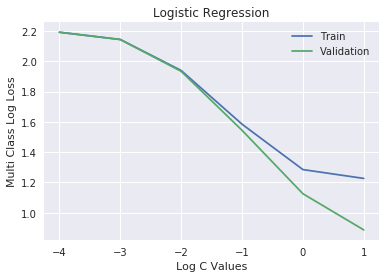

Best hyperparam value: C {'C': 10.0}


In [34]:
# declare models & its hyper params
clf = LogisticRegression(penalty='l2')
hyp_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}

# get best hyper param from cross validation dataset
best_hyper_param = find_best_hyperparam_logreg(clf, hyp_grid, X_train, y_train)

In [35]:
# train the model using the best hyper param
clf = LogisticRegression(penalty='l2', C=best_hyper_param['C'])
clf.fit(X_train, y_train)
predicted_probs_tr = clf.predict_proba(X_train)
log_los_tr = log_loss(y_train, predicted_probs_tr)
print('Log loss on train data with best hyperparam: ', log_los_tr)

# Evaluate the model on Test dataset
predicted_probs_ts = clf.predict_proba(X_test)
log_los_ts = log_loss(y_test, predicted_probs_ts)
print('Log loss on test data with best hyperparam: ', log_los_ts)

Log loss on train data with best hyperparam:  0.9154303216551769
Log loss on test data with best hyperparam:  1.1930723755523691


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the Test errors would be significantly more than train error. </p>

In [36]:
gene_feat_tr_set = set(train_df['Gene'])
gene_feat_ts_set = set(test_df['Gene'])

common_ts_genes = gene_feat_tr_set & gene_feat_ts_set

per_cov_ts = (len(common_ts_genes) * 100.0) / len(gene_feat_tr_set)
print('%d genes of total %d train genes are covered by test set : %f'%(len(common_ts_genes) , 
                                                                       len(gene_feat_tr_set),
                                                                        per_cov_ts,))

151 genes of total 243 train genes are covered by test set : 62.139918


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

Number of unique Variation features :  2094
The features are distributed as below: 



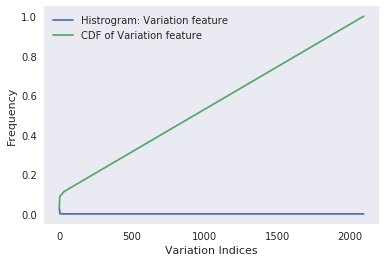

In [37]:
plot_feature_distributions(train_df, 'Variation')

<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

In [38]:
# get features & labels separately
X_train = var_count_feat_train
y_train = train_df['Class']
X_test = var_count_feat_test
y_test = test_df['Class']

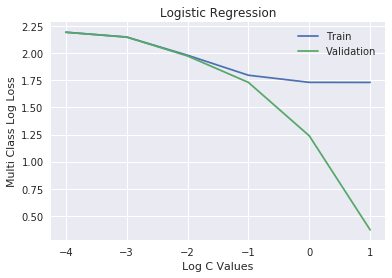

Best hyperparam value: C {'C': 10.0}


In [39]:
# declare models & its hyper params
clf = LogisticRegression(penalty='l2')
hyp_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}

# get best hyper param from cross validation dataset
best_hyper_param = find_best_hyperparam_logreg(clf, hyp_grid, X_train, y_train)

In [40]:
# train the model using the best hyper param
clf = LogisticRegression(penalty='l2', C=best_hyper_param['C'])
clf.fit(X_train, y_train)
predicted_probs_tr = clf.predict_proba(X_train)
log_los_tr = log_loss(y_train, predicted_probs_tr)
print('Log loss on train data with best hyperparam: ', log_los_tr)

# Evaluate the model on Test dataset
predicted_probs_ts = clf.predict_proba(X_test)
log_los_ts = log_loss(y_test, predicted_probs_ts)
print('Log loss on test data with best hyperparam: ', log_los_ts)

Log loss on train data with best hyperparam:  0.3751549003222865
Log loss on test data with best hyperparam:  1.7260262307477015


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [41]:
var_feat_tr_set = set(train_df['Variation'])
var_feat_ts_set = set(test_df['Variation'])

common_ts_var = var_feat_tr_set & var_feat_ts_set


per_cov_ts = (len(common_ts_var) * 100.0) / len(var_feat_ts_set)
print('%d Variation of total %d train Variation are covered by test set : %f'%(len(common_ts_var) , 
                                                                       len(var_feat_tr_set),
                                                                        per_cov_ts,))

20 Variation of total 2094 train Variation are covered by test set : 2.169197


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [42]:
def get_classwise_whole_count_dictionaries(df, feat_name):
    
    # join each string to form a big string
    full_text = ' '.join(df[feat_name].tolist())
    
    # get text full count dictionary
    count_vec_obj = CountVectorizer()
    
    # fit to the big string
    count_vec_obj.fit([full_text])
    
    
    # get the bow count representation
    count_array = (count_vec_obj.transform([full_text]).toarray())[0]
    
    # get word:count dictionary
    full_dict = dict(zip(count_vec_obj.get_feature_names(), count_array))
    
    
    # get classwise dictionary
    class_dict = dict()
    
    # do for each class
    for gid, gdf in df.groupby(['Class']):
        
        full_text = ' '.join(gdf[feat_name].tolist())
        
        count_vec_obj.fit([full_text])
        count_array = (count_vec_obj.transform([full_text]).toarray())[0]
    
        full_dict = dict(zip(count_vec_obj.get_feature_names(), count_array))
        
        class_dict[gid] = full_dict
        
        
    print('Number of class dictionaries :', len(class_dict))

    return full_dict, class_dict    

In [43]:
def response_encoding_text(df, feat_name, full_dict, class_dict):
    
    num_class = 9
    alpha = 1.0
    class_labels_list = list(range(1, num_class + 1))
    
    # do for every text
    all_text_enc_list = list()
    
    # process each individual row one by one
    for text in df[feat_name]:
        
        # declare a vector for encoding initialize as zero vector
        encoded_list = [0.0] * num_class
        
        # get the list of words in the text
        words_list = text.split()
        total_words = len(words_list)
        
        # process for every word
        for word in words_list:
            
            # get the count of word from the full dict, if word is not present return 0
            denominator =  full_dict.get(word, 0)
                
            # do for every class 
            for index, class_no in enumerate(class_labels_list):
                # get the count of word from the class dict, if word is not present return 0
                numerator = class_dict[class_no].get(word, 0)
                # update the encoded list
                encoded_list[index] += np.log((numerator + alpha * 10) / (denominator + alpha * 90))
                
        
        # append to encoded list
        encoded_list = list(np.exp(np.array(encoded_list) / total_words))
        all_text_enc_list.append(encoded_list)
        
    # create encoded data frame
    col_list = ['txt_cls_' + str(i) for i in class_labels_list]
    encoded_df = pd.DataFrame(all_text_enc_list, columns=col_list)
        
    # nomalize the row vectors
    encoded_df = pd.DataFrame(normalize(encoded_df.values, norm='l2', axis=1), columns=col_list)
        
        
    return encoded_df    

In [44]:
train_df.head()

,ID,Gene,Variation,TEXT,Class
0,837,ABL1,BCR-ABL1_Fusion,bcr abl oncogene generated philadelphia chromo...,7
1,493,TP53,R156C,tumor suppressor p53 dependent apoptosis thoug...,1
2,1376,AKT2,Amplification,previously demonstrated putative oncogene akt2...,7
3,3283,RET,E768D,several mutations identi ed kinase domain ret ...,2
4,2708,BRAF,FAM131B-BRAF_Fusion,genes crucial cancer development mutated via v...,7


In [45]:
full_dict, class_dict = get_classwise_whole_count_dictionaries(train_df, 'TEXT')

Number of class dictionaries : 9


In [46]:
#response coding of text features
text_response_coding_train  = response_encoding_text(train_df, 'TEXT', full_dict, class_dict)
text_response_coding_test  = response_encoding_text(test_df, 'TEXT', full_dict, class_dict)

In [47]:
text_response_coding_train.head()

,txt_cls_1,txt_cls_2,txt_cls_3,txt_cls_4,txt_cls_5,txt_cls_6,txt_cls_7,txt_cls_8,txt_cls_9
0,0.310007,0.322107,0.052857,0.383367,0.117426,0.137037,0.784390,0.026984,0.042601
1,0.497635,0.285996,0.054467,0.519657,0.132252,0.164782,0.591402,0.027305,0.049102
2,0.336888,0.302474,0.065920,0.365679,0.129038,0.134495,0.784854,0.037657,0.069250
3,0.296638,0.350547,0.060826,0.381435,0.139218,0.121461,0.776456,0.027782,0.046263
4,0.311841,0.356645,0.052052,0.343076,0.121950,0.130782,0.787546,0.029820,0.045347


## B) BoW representation & TF-IDF representation of TEXT

In [48]:
# 1) Encode text data using TF-IDF Representation
tfidf_vec_obj = TfidfVectorizer(min_df=0.005, max_df=0.95, max_features=3000, 
                                ngram_range=(1,4))
tfidf_vec_obj.fit(train_df['TEXT'])

# get feature names as a list
feat_names_list = tfidf_vec_obj.get_feature_names()

# don't forget to normalize every feature
text_tfidf_coding_train = tfidf_vec_obj.transform(train_df['TEXT'])
text_tfidf_coding_train = pd.DataFrame(text_tfidf_coding_train.toarray(),
                                       columns=feat_names_list)
# we use the same vectorizer that was trained on train data
text_tfidf_coding_test = tfidf_vec_obj.transform(test_df['TEXT'])
text_tfidf_coding_test = pd.DataFrame(text_tfidf_coding_test.toarray(),
                                      columns=feat_names_list)


# 2) Bi gram features for Logistic Regression model
count_vec_bgram_obj = CountVectorizer(ngram_range=(1,2), min_df=0.005, max_df=0.95,
                                      max_features=3000)
count_vec_bgram_obj.fit(train_df['TEXT'])

# get feature names as a list
feat_names_list = count_vec_bgram_obj.get_feature_names()

# don't forget to normalize every feature
text_bibow_coding_train = count_vec_bgram_obj.transform(train_df['TEXT'])
text_bibow_coding_train = pd.DataFrame(text_bibow_coding_train.toarray(),
                                       columns=feat_names_list)
# we use the same vectorizer that was trained on train data
text_bibow_coding_test = count_vec_bgram_obj.transform(test_df['TEXT'])
text_bibow_coding_test = pd.DataFrame(text_bibow_coding_test.toarray(),
                                      columns=feat_names_list)

Number of unique TEXT features :  131487
The features are distributed as below: 



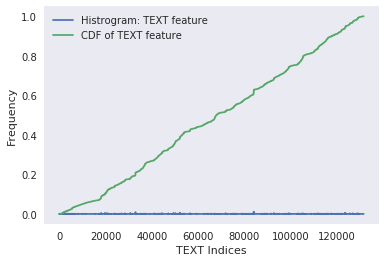

In [49]:
plot_feature_distributions(train_df, 'TEXT', text_mode=True)

In [50]:
# get features & labels separately
X_train = text_bibow_coding_train
y_train = train_df['Class']
X_test = text_bibow_coding_test
y_test = test_df['Class']

/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


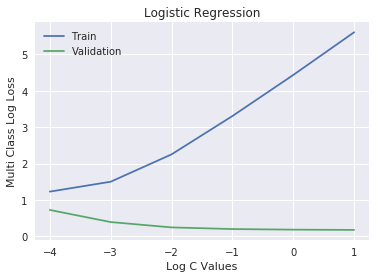

Best hyperparam value: C {'C': 0.0001}


In [51]:
# declare models & its hyper params
clf = LogisticRegression(penalty='l2')
hyp_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}

# get best hyper param from cross validation dataset
best_hyper_param = find_best_hyperparam_logreg(clf, hyp_grid, X_train, y_train)

In [52]:
# train the model using the best hyper param
clf = LogisticRegression(penalty='l2', C=best_hyper_param['C'])
clf.fit(X_train, y_train)
predicted_probs_tr = clf.predict_proba(X_train)
log_los_tr = log_loss(y_train, predicted_probs_tr)
print('Log loss on train data with best hyperparam: ', log_los_tr)

Log loss on train data with best hyperparam:  0.737860934109062


In [53]:
# Evaluate the model on Test dataset
predicted_probs_ts = clf.predict_proba(X_test)
log_los_ts = log_loss(y_test, predicted_probs_ts)
print('Log loss on test data with best hyperparam: ', log_los_ts)

Log loss on test data with best hyperparam:  1.1902999552349864


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [54]:
def get_intersec_text(trian_df, other_df):
    
    # get vectorizer
    count_vec = CountVectorizer(min_df=0.005, max_df=0.95, max_features=3000)
    
    # get unique words of train data
    count_vec.fit(trian_df['TEXT'])
    train_features = set(count_vec.get_feature_names())
    
    # get unique words of other data
    count_vec.fit(other_df['TEXT'])
    other_features = set(count_vec.get_feature_names())
    
    # get commmon words
    common_words_set = train_features & other_features
    
    # get feature count of each type of data
    num_train_features = len(train_features)
    num_other_features = len(other_features)
    num_common_words = len(common_words_set)
    
    ret_tuple = (num_train_features, num_other_features, num_common_words,)
    
    #coverage = (num_common_words * 100.0) / num_other_features
    print('# train features(words):%d, Other df words:%d, common words:%d'%ret_tuple)
    
    return ret_tuple

In [55]:
test_counts_info = get_intersec_text(train_df, test_df)

# train features(words):3000, Other df words:3000, common words:2831


<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

### a) Response encoded Text, Gene, Variation

In [56]:
res_enc_train = pd.concat([res_encoded_gene_train, res_encoded_var_train, 
                           text_response_coding_train], axis=1)
res_enc_train['Label'] = y_train
res_enc_train['ID'] = train_df['ID']


res_enc_test = pd.concat([res_encoded_gene_test, res_encoded_var_test, 
                          text_response_coding_test], axis=1)
res_enc_test['Label'] = y_test
res_enc_test['ID'] = test_df['ID']

In [57]:
res_enc_test.head()

,Gene_cls_1,Gene_cls_2,Gene_cls_3,Gene_cls_4,Gene_cls_5,Gene_cls_6,Gene_cls_7,Gene_cls_8,Gene_cls_9,Variation_cls_1,...,txt_cls_2,txt_cls_3,txt_cls_4,txt_cls_5,txt_cls_6,txt_cls_7,txt_cls_8,txt_cls_9,Label,ID
0,0.133363,0.102587,0.153881,0.943801,0.123104,0.102587,0.102587,0.102587,0.102587,0.333333,...,0.241903,0.081329,0.673463,0.135594,0.138891,0.571859,0.029039,0.049997,4,2160
1,0.527026,0.087838,0.210810,0.324999,0.614864,0.404053,0.087838,0.087838,0.087838,0.333333,...,0.208513,0.098989,0.585623,0.184118,0.385307,0.498507,0.026397,0.045978,6,2517
2,0.298829,0.353162,0.271663,0.298829,0.271663,0.325995,0.543326,0.271663,0.271663,0.333333,...,0.295147,0.067328,0.430490,0.136399,0.174333,0.719943,0.034165,0.059677,4,2381
3,0.192095,0.268933,0.345770,0.192095,0.249723,0.192095,0.749169,0.192095,0.192095,0.333333,...,0.311618,0.063975,0.238983,0.117999,0.119678,0.871482,0.022833,0.034372,7,1528
4,0.147154,0.529756,0.147154,0.147154,0.147154,0.161870,0.750487,0.147154,0.147154,0.333333,...,0.296605,0.063341,0.233855,0.095713,0.111868,0.887650,0.024259,0.037644,3,2968


### b) Bow & TF-IDF Text features, onehot encoded gene, variation

In [58]:
# 1) TFIDF Features DF 
tfidf_df_train = pd.concat([gene_count_feat_train, var_count_feat_train, 
                           text_tfidf_coding_train], axis=1)
# add label & id column
tfidf_df_train['Label'] = y_train
tfidf_df_train['ID'] = train_df['ID']


tfidf_df_test = pd.concat([gene_count_feat_test, var_count_feat_test,
                           text_tfidf_coding_test], axis=1)
tfidf_df_test['Label'] = y_test
tfidf_df_test['ID'] = test_df['ID']

print('TF-IDF encoded train data shape: ', tfidf_df_train.shape)



# 2) Bow Bigram Features DF (both unigram & bi-gram)
bow_bi_df_train = pd.concat([gene_count_feat_train, var_count_feat_train,
                             text_bibow_coding_train], axis=1)
bow_bi_df_train['Label'] = y_train
bow_bi_df_train['ID'] = train_df['ID']


bow_bi_df_test = pd.concat([gene_count_feat_test, var_count_feat_test, 
                            text_bibow_coding_test], axis=1)
bow_bi_df_test['Label'] = y_test
bow_bi_df_test['ID'] = test_df['ID']

print('BoW bigram encoded train data shape: ', bow_bi_df_train.shape)

TF-IDF encoded train data shape:  (2324, 5369)
BoW bigram encoded train data shape:  (2324, 5369)


In [59]:
tfidf_df_test.head()

,abl1,acvr1,ago2,akt1,akt2,akt3,alk,apc,ar,araf,...,xl,year,years,yeast,yellow,yes,yet,zinc,Label,ID
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,4,2160
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00908,0.0,0.0,0.001994,0.0,6,2517
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.001287,0.0,4,2381
3,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,7,1528
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,3,2968


In [60]:
bow_bi_df_test.head()

,abl1,acvr1,ago2,akt1,akt2,akt3,alk,apc,ar,araf,...,xl,year,years,yeast,yellow,yes,yet,zinc,Label,ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2160
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,0,6,2517
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,2381
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7,1528
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2968


# Save all the dataframes to disk

In [61]:
# Save Response Encoded Data
res_enc_train.to_csv('./data/Response_Encoded_train.csv', index=False)
res_enc_test.to_csv('./data/Response_Encoded_test.csv', index=False)

# Save TF-IDF related features
tfidf_df_train.to_csv('./data/TF_IDF_train.csv', index=False)
tfidf_df_test.to_csv('./data/TF_IDF_test.csv', index=False)

# Save BoW related features
bow_bi_df_train.to_csv('./data/BoW_bigram_train.csv', index=False)
bow_bi_df_test.to_csv('./data/BoW_bigram_test.csv', index=False)

# Procedure Summary

<ul>
<li> Data cleaning and preprocessing of all the three fields gene, variation & text </li>
<li> Converted the fields to vectors using multiple methods </li>
<li> Vectoried data using Bag of Words method </li>
<li> Vectoried data using TF-IDF method </li>
<li> Vectoried data using response encoding method method</li>
</ul>

# Conclusion

<ul>
<li> Prepared the dataset from raw data </li>
<li> Basic Analysis is done on all three types of features and results are plotted </li>
<li> Obtained statistical results such as the distribution of data points, </li>
<li> Identified that the gene feature is really useful in prediction train loss: 0.9154
     and test log loss 1.1930.</li>
<li> The coverage of variation feature in test data is very less 2.16%, train log loss :0.3751
     and test log loss 1.7260 showed deviation</li>
<li> Identified that the text data is also useful in deciding the class train log loss: 0.73786
     and test log loss 1.1902. Also the coverage of words in test data is 2831/3000</li>
<li> Random model showed a test log loss of 2.5032, so our model needs to give a log loss 
     better than 2.5032 </li>
</ul>